In [ ]:
#import
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
#data
credit_card_data=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
#datacleaning
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#distribution of legit and fraud transaction
credit_card_data['Class'].value_counts()
#0 is legit , fraud is 1.

0    284315
1       492
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


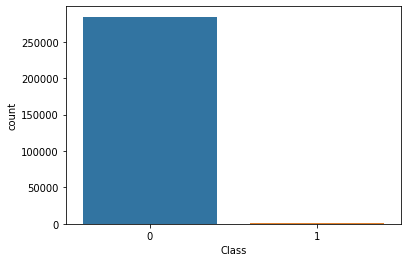

In [ ]:
#visualization
sns.countplot(credit_card_data['Class'])

In [ ]:
#diversify the dataset
dflegit=credit_card_data[credit_card_data.Class==0]
dffraud=credit_card_data[credit_card_data.Class==1]
print(dflegit.shape)
print(dffraud.shape)

(284315, 31)
(492, 31)


In [ ]:
dflegit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
dffraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
#Under Sampleing (as our dataset is unbalanced)
legit=dflegit.sample(n=492)
fraud=dffraud.sample(n=492)

In [ ]:
df = pd.concat([legit,fraud],axis=0)

In [ ]:
df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


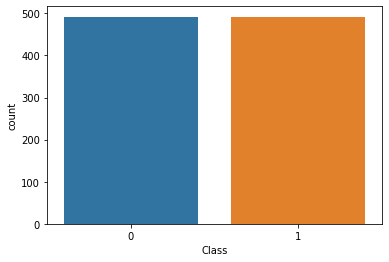

In [ ]:
sns.countplot(df['Class'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


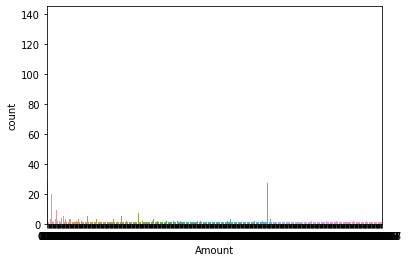

In [ ]:
sns.countplot(df['Amount'])

In [ ]:
#Differentiate between target and features
x=df.drop(columns='Class',axis=1)
y=df['Class']
print(x)
print(y)

            Time         V1         V2  ...       V27       V28  Amount
250828  155091.0   1.893714  -0.486365  ...  0.071290 -0.034323   21.74
46224    42691.0   1.091094  -0.580048  ...  0.101689  0.040544   47.84
272737  165241.0   2.179965  -1.678794  ...  0.035839 -0.050018   29.00
2889      2437.0  -0.366718   0.603588  ...  0.250438 -0.023550    1.00
28979    35263.0  -0.306795   0.050918  ...  0.121953  0.125976   99.00
...          ...        ...        ...  ...       ...       ...     ...
262560  160537.0   0.567539   3.309385  ...  0.902675  0.473571    4.69
153835  100298.0 -22.341889  15.536133  ... -4.380154 -0.467863    1.00
213092  139107.0  -4.666500  -3.952320  ... -0.513880  0.729526   22.47
14197    25231.0 -16.598665  10.541751  ...  1.707521  0.511423   99.99
154371  101313.0 -25.825982  19.167239  ... -4.950022 -0.448413    2.28

[984 rows x 30 columns]
250828    0
46224     0
272737    0
2889      0
28979     0
         ..
262560    1
153835    1
213092    1
141

In [ ]:
#train,test split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=20,stratify=y,shuffle=True)

In [ ]:
print(x.shape,x_train.shape ,x_test.shape)

(984, 30) (787, 30) (197, 30)


In [ ]:
#build model
from sklearn.linear_model import LogisticRegression as lgr
from sklearn.metrics import accuracy_score

In [ ]:
modelLR=lgr()
modelLR.fit(x_train,y_train)
predict_train= modelLR.predict(x_train)
accuracy_train=accuracy_score(predict_train,y_train)
print("Acc : ",accuracy_train)

Acc :  0.9415501905972046


In [ ]:
modelLR=lgr()
modelLR.fit(x_train,y_train)
predict_test= modelLR.predict(x_test)
accuracy_test=accuracy_score(predict_test,y_test)
print("Acc_test : ",accuracy_test)

Acc_test :  0.934010152284264
